<a href="https://colab.research.google.com/github/vinayak-7569/spam-sms-detector/blob/main/sms_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
label
0    4825
1     747
Name: count, dtype: int64

🔹 Naïve Bayes Accuracy: 0.9641255605381166

🔹 Logistic Regression Accuracy: 0.9623318385650225

🔹 Random Forest Accuracy: 0.9739910313901345


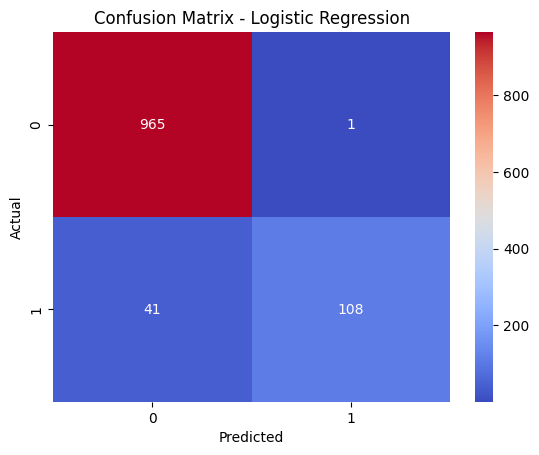

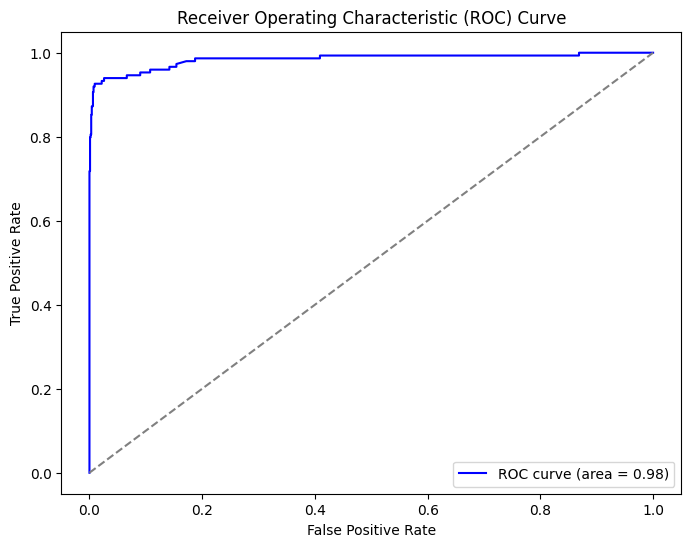


🔍 Test Messages:
1. Free entry to a cash prize!: Spam
2. Hey, how are you doing? Not Spam


In [1]:
# ✅ Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# ✅ Load dataset
url = "/content/spam.csv"
df = pd.read_csv(url, encoding="latin-1")

# ✅ Explore dataset
print(df.head())

# ✅ Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']  # Rename columns

# ✅ Encode label (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# ✅ Check class balance
print(df['label'].value_counts())

# ✅ Text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

# ✅ Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

# ✅ Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ✅ Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

# ✅ Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_vec, y_train)
y_pred_log = log_model.predict(X_test_vec)

# ✅ Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)
y_pred_rf = rf_model.predict(X_test_vec)

# ✅ Evaluate models
print("\n🔹 Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\n🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\n🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# ✅ Confusion Matrix for the best model (Logistic Regression)
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ✅ ROC Curve
y_prob_log = log_model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# ✅ Test with a custom SMS message
def predict_sms(message):
    cleaned_message = clean_text(message)
    vectorized_message = vectorizer.transform([cleaned_message])
    prediction = log_model.predict(vectorized_message)[0]
    return "Spam" if prediction == 1 else "Not Spam"

# ✅ Example Predictions
print("\n🔍 Test Messages:")
print("1. Free entry to a cash prize!:", predict_sms("Free entry to a cash prize!"))
print("2. Hey, how are you doing?", predict_sms("Hey, how are you doing?"))
